# Tutorial for KN injection and recovery with $\tt{xkn}$

This tutorial will show how to inject KN lightcurves for a BNS event and how to proceed with the inference of the parameters.

## Injection

First of all we have to generate some injected data using $\tt{xkn}$ model.

For this example we are using these input values:
- view_angle: 0.524
- distance: 40
- m_ej_dynamics: 0.03
- vel_dynamics: 0.13
- op_dynamics: 8

and these lower and upper bounds for generating the standard deviation associated to our data:
- sigma_min=0.0001
- sigma_max=0.1.

The other parameters and variables associated to the model are defined in the $\tt{kn\_config.ini}$ file. 

Here the plot of the injected lightcurves:

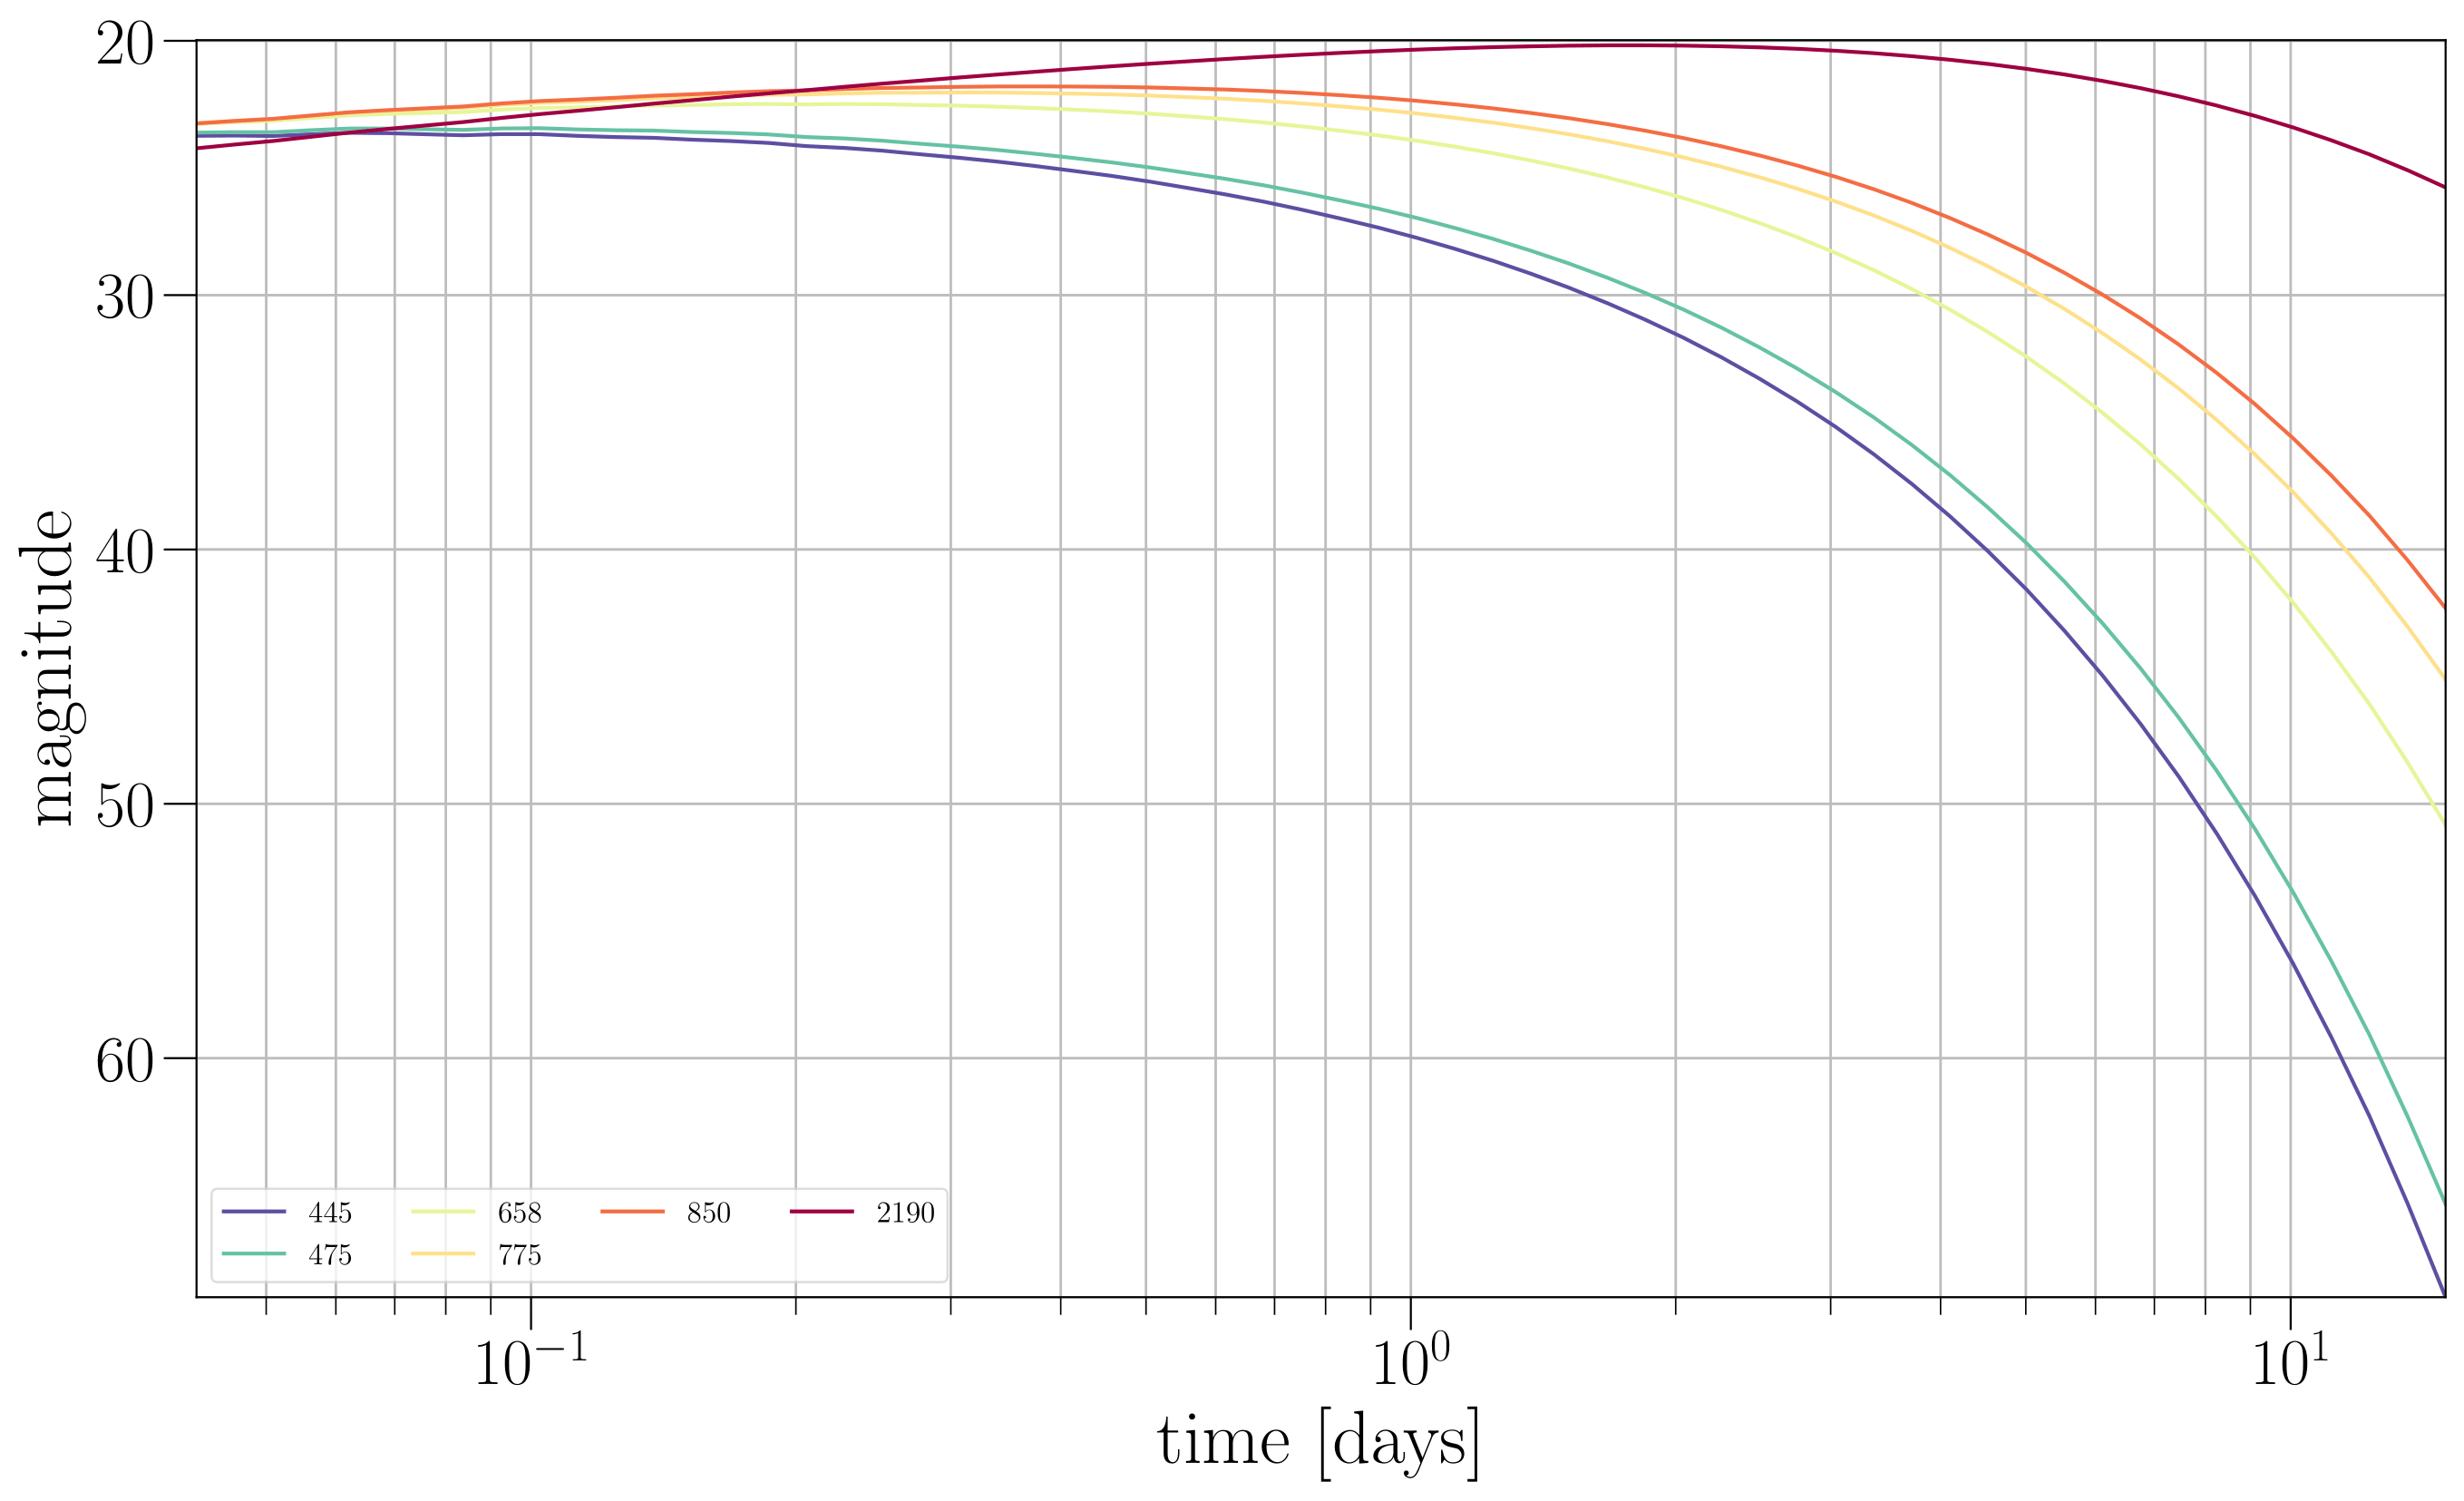

In [1]:
from IPython.display import Image
Image(filename="./plot-1.png")

## Inference

The inference can be started with two commands.

Setup command:

`bajes_setup --outdir ./run --tag kn --t-gps 1187008857 --kn-approx Xkn-1 --use-mag-dev --mag-folder ./Injected_data --band B --band g --band I --band R --band K --band z --use-dereddening --mej-max 1e-1 --mej-min 0 --vel-max 0.333 --vel-min 1e-3 --opac-max 30 --opac-min 0.1 --fix-name eps0 --fix-value 1e18 --fix-name eps_time --fix-value 1.3 --tshift-max 25 --tshift-min 24 --dist-min 10 --dist-max 75 --xkn ./config.ini --ntime 60 --t-start-grid 3600. --t-scale log`

Inference command:

`python -m bajes -o ./run -I ./run/inf.pkl --checkpoint 1000 --engine dynesty --nlive 5000 --maxmcmc 15000 --tol 0.1 --seed 1234567`

In [ ]:
from bajes.pipe import execute_bash

setup_command = "bajes_setup -o ./run --tag gw --ifo H1 --asd design --strain ./injection/H1_INJECTION.txt --ifo L1 --asd design --strain ./injection/L1_INJECTION.txt --seglen 16 --srate 4096 --t-gps 126259462.0 --f-min 20 --f-max 2048 --gw-approx LALSimFD-IMRPhenomXP --mc-min 23 --mc-max 37 --q-max 8 --spin-flag align-isotropic --spin-max 0.9 --dist-min 100. --dist-max 5000. --marg-phi-ref --fd-inj"
execute_bash(setup_command)

inf_command = "python -m bajes -o ./run -I ./run/inf.pkl --checkpoint 1000 --engine dynesty --nlive 1024 --seed 1234567 --verbose"
execute_bash(inf_command)

## Postprocess

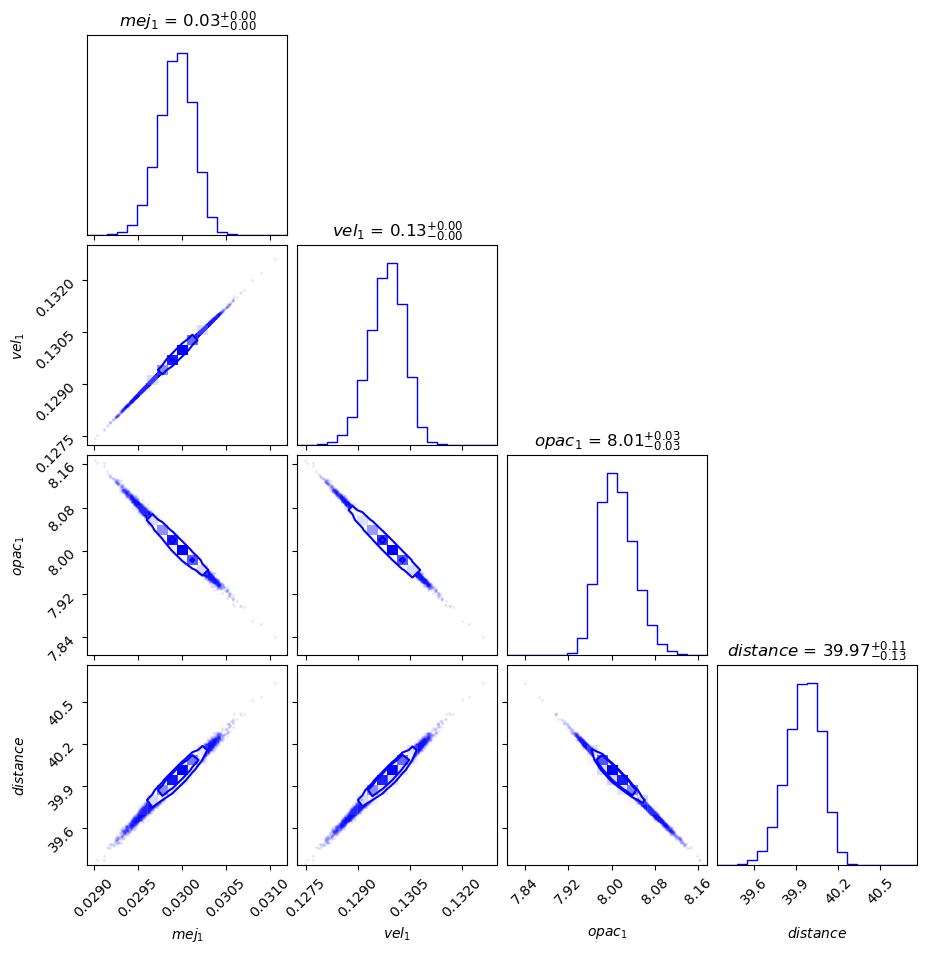

In [6]:
import numpy as np
import corner

posterior_file = '/home/ye54tud/run_modificato_giusto/posterior.dat'
posterior      = np.genfromtxt(posterior_file, names=True)

fig = corner.corner(np.vstack([posterior['mej_1'], posterior['vel_1'], posterior['opac_1'], posterior['distance']]).T, 
                  labels=[r"$mej_{1}$", r"$vel_{1}$", r"$opac_{1}$", r"$distance$"], show_titles=True, title_kwargs={"fontsize": 12}, color='blue')